In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## NAME: BARANOV MAXIM
## GROUP: IT3-2106
## DATASET: salary_data_cleaned.csv

In [2]:
data = pd.read_csv('salary.csv')
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
data.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              193
Years of Experience     37
Salary                 444
dtype: int64

In [4]:
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [5]:
data['Education Level'] = data['Education Level'].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    'phD': 'PhD'
})

In [6]:
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, 'High School'], dtype=object)

In [7]:
data = data.dropna(subset=['Education Level'])

In [8]:
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [9]:
data['Age'].unique()

array([32., 28., 45., 36., 52., 29., 42., 31., 26., 38., 48., 35., 40.,
       27., 44., 33., 39., 25., 51., 34., 47., 30., 41., 37., 24., 43.,
       50., 46., 49., 23., 53., 61., 57., 62., 55., 56., 54., 60., 58.,
       22., 21.])

In [10]:
data[data['Gender'] == 'Other']

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2378,53.0,Other,High School,Senior Project Engineer,31.0,166109.0
2385,25.0,Other,High School,Full Stack Engineer,2.0,69032.0
2406,37.0,Other,Master's,Full Stack Engineer,14.0,161393.0
2448,31.0,Other,High School,Back end Developer,8.0,104127.0
2454,23.0,Other,High School,Front end Developer,2.0,62852.0
2458,53.0,Other,High School,Senior Project Engineer,31.0,166109.0
2465,25.0,Other,High School,Full Stack Engineer,2.0,69032.0
2486,37.0,Other,Master's,Full Stack Engineer,14.0,161393.0
2528,31.0,Other,High School,Back end Developer,8.0,104127.0
2534,23.0,Other,High School,Front end Developer,2.0,62852.0


In [11]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0


In [12]:
data = data[data['Gender'] != 'Other']

In [13]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
data['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [15]:
junior_senior_rows = data[data['Job Title'].str.contains('Junior|Senior', case=False, na=False)]
junior_senior_rows

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0
17,39.0,Male,PhD,Senior Engineer,12.0,115000.0
27,24.0,Male,Bachelor's,Junior Developer,1.0,40000.0
28,43.0,Female,PhD,Senior Consultant,15.0,140000.0
...,...,...,...,...,...,...
6677,36.0,Female,PhD,Senior Product Marketing Manager,10.0,100000.0
6685,49.0,Female,PhD,Senior Product Marketing Manager,20.0,200000.0
6686,32.0,Male,High School,Junior Sales Representative,3.0,40000.0
6697,51.0,Female,Master's,Senior Product Marketing Manager,19.0,190000.0


In [16]:
junior_senior_rows_copy = junior_senior_rows.copy()
junior_senior_rows_copy['Level'] = junior_senior_rows_copy['Job Title'].str.extract(r'(Junior|Senior)', expand=False)
junior_senior_rows_copy['Job Title'] = junior_senior_rows_copy['Job Title'].str.replace(r'(Junior|Senior)', '', case=False, regex=True).str.strip()
junior_senior_rows_copy

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Level
2,45.0,Male,PhD,Manager,15.0,150000.0,Senior
9,38.0,Male,PhD,Scientist,10.0,110000.0,Senior
17,39.0,Male,PhD,Engineer,12.0,115000.0,Senior
27,24.0,Male,Bachelor's,Developer,1.0,40000.0,Junior
28,43.0,Female,PhD,Consultant,15.0,140000.0,Senior
...,...,...,...,...,...,...,...
6677,36.0,Female,PhD,Product Marketing Manager,10.0,100000.0,Senior
6685,49.0,Female,PhD,Product Marketing Manager,20.0,200000.0,Senior
6686,32.0,Male,High School,Sales Representative,3.0,40000.0,Junior
6697,51.0,Female,Master's,Product Marketing Manager,19.0,190000.0,Senior


# Spotless And Modified DataSet: salary_data

In [17]:
salary_data = junior_senior_rows_copy.copy()
salary_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Level
2,45.0,Male,PhD,Manager,15.0,150000.0,Senior
9,38.0,Male,PhD,Scientist,10.0,110000.0,Senior
17,39.0,Male,PhD,Engineer,12.0,115000.0,Senior
27,24.0,Male,Bachelor's,Developer,1.0,40000.0,Junior
28,43.0,Female,PhD,Consultant,15.0,140000.0,Senior
...,...,...,...,...,...,...,...
6677,36.0,Female,PhD,Product Marketing Manager,10.0,100000.0,Senior
6685,49.0,Female,PhD,Product Marketing Manager,20.0,200000.0,Senior
6686,32.0,Male,High School,Sales Representative,3.0,40000.0,Junior
6697,51.0,Female,Master's,Product Marketing Manager,19.0,190000.0,Senior


In [18]:
salary_data.reset_index(drop=True, inplace=True)
# salary_data.to_csv('salary_data_cleaned.csv', index=False)

In [19]:
data = pd.read_csv('salary_data_cleaned.csv')

## Here it is

In [20]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Level
0,45.0,Male,PhD,Manager,15.0,150000.0,Senior
1,38.0,Male,PhD,Scientist,10.0,110000.0,Senior
2,39.0,Male,PhD,Engineer,12.0,115000.0,Senior
3,24.0,Male,Bachelor's,Developer,1.0,40000.0,Junior
4,43.0,Female,PhD,Consultant,15.0,140000.0,Senior
...,...,...,...,...,...,...,...
1527,36.0,Female,PhD,Product Marketing Manager,10.0,100000.0,Senior
1528,49.0,Female,PhD,Product Marketing Manager,20.0,200000.0,Senior
1529,32.0,Male,High School,Sales Representative,3.0,40000.0,Junior
1530,51.0,Female,Master's,Product Marketing Manager,19.0,190000.0,Senior


# Study Goal:
### This dataset can be highly beneficial in a production environment, particularly for HR departments. By analyzing the data, HR professionals can accurately determine appropriate salary levels based on factors such as job seniority (Junior or Senior), years of experience, education level, and age. This approach ensures fair and competitive compensation packages that align with industry standards and individual qualifications, thereby improving employee satisfaction and retention.

In [21]:
data['Salary'].min()

350.0

In [22]:
data['Salary'].max()

210000.0

In [23]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

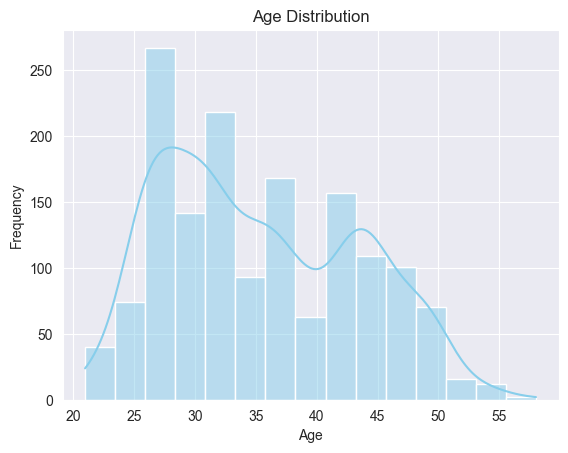

In [24]:
sns.histplot(salary_data['Age'], kde=True, bins=15, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

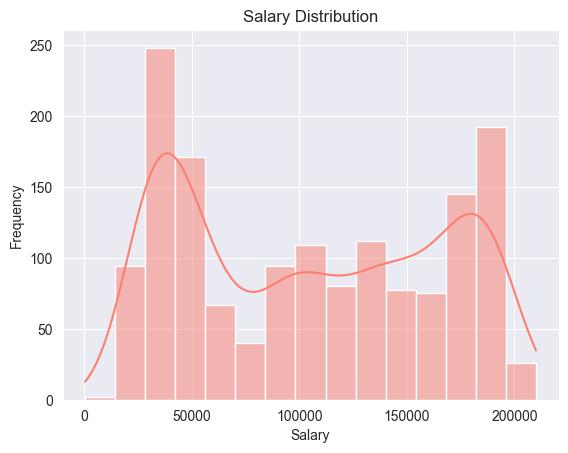

In [25]:
sns.histplot(salary_data['Salary'], kde=True, bins=15, color='salmon')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

Text(0, 0.5, 'Salary')

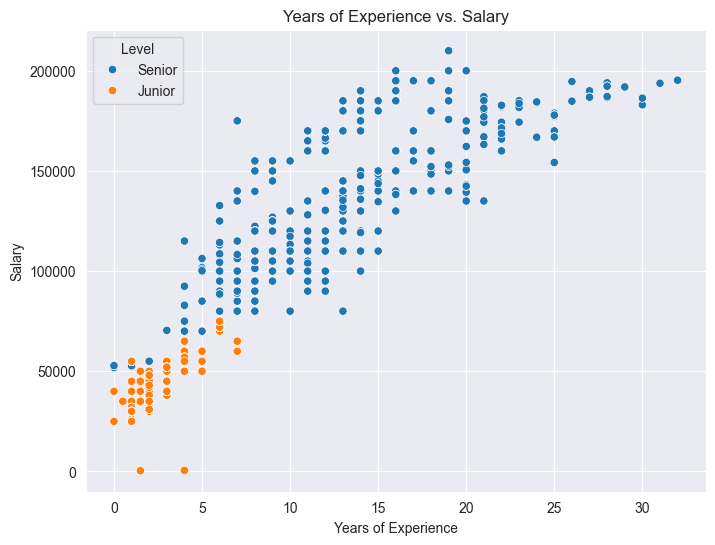

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Years of Experience', y='Salary', hue='Level', data=salary_data)
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Text(0.5, 1.0, 'QQ-Plot of Salary')

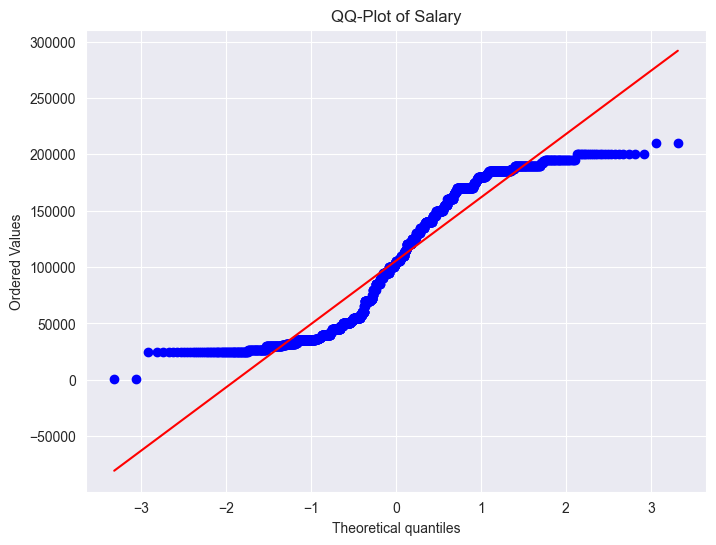

In [27]:
plt.figure(figsize=(8, 6))
stats.probplot(salary_data['Salary'], dist="norm", plot=plt)
plt.title('QQ-Plot of Salary')

## Null Hypothesis (H0): There is no significant relationship between education level, job seniority (Junior/Senior), years of experience, age, and the annual salary. In other words, these factors do not have a predictive influence on the salary.

## Alternative Hypothesis (H1): There is a significant relationship between at least one of the factors (education level, job seniority, years of experience, or age) and the annual salary. This implies that changes in these factors can help predict variations in salary.

## ~>Now Creating Model

#### Imports

In [28]:
from sklearn.model_selection import train_test_split # функция для разделения данных на обучающую и тестовую выборки.
from sklearn.linear_model import LinearRegression # класс для создания и обучения модели линейной регрессии.
from sklearn.tree import DecisionTreeRegressor # класс для создания и обучения модели дерева решений.
from sklearn.metrics import mean_squared_error, r2_score # метрики оценки качества предсказаний моделей (среднеквадратическая ошибка и коэффициент детерминации R²).

#### Prepare Dataset

In [29]:
salary_data_encoded = pd.get_dummies(salary_data, columns=['Education Level', 'Level'], drop_first=True)
# pd.get_dummies создает отдельные столбцы для каждого уникального значения в категориальных признаках
# drop_first=True убирает один из столбцов, чтобы избежать проблемы избыточности данных

## One-hot encoding
### Способ преобразования категориальных (текстовых) признаков в числовой формат, который можно использовать в моделях машинного обучения.
### Пример:
    Bachelor Master PhD
    1        0      0
    0        1      0
    0        0      1
    где 1 -> True, 2 -> False
### Let's Check It:

In [30]:
salary_data_encoded

,Age,Gender,Job Title,Years of Experience,Salary,Education Level_High School,Education Level_Master's,Education Level_PhD,Level_Senior
0,45.0,Male,Manager,15.0,150000.0,False,False,True,True
1,38.0,Male,Scientist,10.0,110000.0,False,False,True,True
2,39.0,Male,Engineer,12.0,115000.0,False,False,True,True
3,24.0,Male,Developer,1.0,40000.0,False,False,False,False
4,43.0,Female,Consultant,15.0,140000.0,False,False,True,True
...,...,...,...,...,...,...,...,...,...
1527,36.0,Female,Product Marketing Manager,10.0,100000.0,False,False,True,True
1528,49.0,Female,Product Marketing Manager,20.0,200000.0,False,False,True,True
1529,32.0,Male,Sales Representative,3.0,40000.0,True,False,False,False
1530,51.0,Female,Product Marketing Manager,19.0,190000.0,False,True,False,True


#### Create features X and Target Y

In [31]:
# features X (Age) and target Y (Years of Experience)
feature_columns = ['Age', 'Years of Experience']

# Add columns related to 'Education Level_' and 'Level_'
for col in salary_data_encoded.columns:
    if 'Education Level_' in col or 'Level_' in col:
        feature_columns.append(col)

X = salary_data_encoded[feature_columns]
y = salary_data_encoded['Salary']

#### Split into train and test using common function, where size of tet data is 20 percent of actual data

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

#### Linear Regression

In [33]:
# 1. Linear Regression Model
linear_model = LinearRegression() # Create Linear Regression Model

'''

    y = w_0 + w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n

     w_0 - bias
     w_n - coefficients of regression (weights)
     x_n - variables

     goal: find  weights that our line will match data

     MSE = sum(y_i - y_prime_i)^2 / m

     m - amount of observe data
     y_i - initial values
     y_prime_i - prediction value

     calculate loss on step
     update weights

     w = (X^T * X)^(-1) * X^T * y
'''

linear_model.fit(X_train, y_train) # It's fitting, studying, learning model

LinearRegression()

In [41]:
# Predictions and evaluation
single_sample = X_test.iloc[[0]]
true_salary = y_test.iloc[0]
predicted_salary = linear_model.predict(single_sample)[0]



true_salary, predicted_salary

(125000.0, 119366.73238152282)

In [47]:
single_sample = X_test
true_salary = y_test
predicted_salary = linear_model.predict(single_sample)

mean_squared_error(true_salary, predicted_salary)

262219266.62835166

## Tree

In [35]:
# 2. Decision Tree Model
tree_model = DecisionTreeRegressor(random_state=18)
tree_model.fit(X_train, y_train)

# рекурсивного разделения данных на подмножества. В каждом узле дерева алгоритм выбирает один признак и пороговое значение, которые разделяют данные на два подмножества так, чтобы минимизировать критерий разбиения. Для задачи регрессии это, как правило, сумма квадратов отклонений (mean squared error, MSE) до и после разделения.

DecisionTreeRegressor(random_state=18)

In [48]:
single_sample_tree = X_test.iloc[[0]]
true_salary_tree = y_test.iloc[0]

predicted_salary_tree = tree_model.predict(single_sample_tree)[0]

true_salary_tree, predicted_salary_tree

(125000.0, 122500.0)

In [ ]:
# y_pred_tree = tree_model.predict(X_test)
# mse_tree = mean_squared_error(y_test, y_pred_tree)
# r2_tree = r2_score(y_test, y_pred_tree)
#
# r2_tree